In [83]:
import numpy as np
import pandas as pd
import  os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_data = np.load("X.npy")
y_data = np.load("Y.npy")

In [12]:
len(x_data)

2062

In [13]:
len(y_data)

2062

(-0.5, 63.5, 63.5, -0.5)

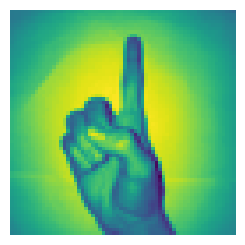

In [11]:
plt.subplot(1,2,1)
plt.imshow(x_data[900])
plt.axis("off")

(-0.5, 63.5, 63.5, -0.5)

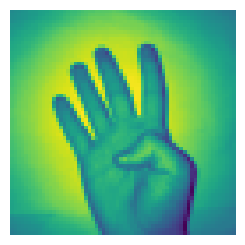

In [82]:
plt.subplot(1,2,1)
plt.imshow(x_data[1245])
plt.axis("off")

In [14]:
x = x_data

***the number of pictures in the data set.***

    204-409 => 0
    822-1028 => 1
    1649-1855 => 2
    1443-1649 => 3
    1236-1443 => 4
    1855-2062 => 5
    615-822 => 6
    409-615 => 7
    1028-1236 => 8
    0-204 => 9

In [16]:
X_labeled =  np.concatenate((x[204:409,:],
                             x[822:1028,:],
                             x[1649:1855,:],
                             x[1443:1649,:],
                             x[1236:1443,:],
                             x[1855:2062,:],
                             x[615:822,:],
                             x[409:615,:],
                             x[1028:1236,:],
                             x[0:204,:]),axis = 0)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_labeled, y_data, test_size= 0.2)

In [20]:
x_train.shape

(1649, 64, 64)

In [21]:
y_train.shape

(1649, 10)

# CNN

In [22]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


 
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])




In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)       

In [61]:
history = model.fit(x_train,y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
52/52 [==============================] - 8s 147ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.1467 - val_accuracy: 0.9467
Epoch 2/100
52/52 [==============================] - 10s 199ms/step - loss: 0.0140 - accuracy: 0.9964 - val_loss: 0.1608 - val_accuracy: 0.9661
Epoch 3/100
52/52 [==============================] - 9s 170ms/step - loss: 0.0217 - accuracy: 0.9921 - val_loss: 0.1898 - val_accuracy: 0.9588
Epoch 4/100
52/52 [==============================] - 9s 181ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.1879 - val_accuracy: 0.9637
Epoch 5/100
52/52 [==============================] - 10s 194ms/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.1930 - val_accuracy: 0.9492
Epoch 6/100
52/52 [==============================] - 9s 170ms/step - loss: 0.0368 - accuracy: 0.9873 - val_loss: 0.2307 - val_accuracy: 0.9492
Epoch 7/100
52/52 [==============================] - 10s 186ms/step - loss: 0.0393 - accuracy: 0.9848 - val_loss: 0.1724 - val_accuracy: 0.9

52/52 [==============================] - 20s 391ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.2046 - val_accuracy: 0.9492
Epoch 58/100
52/52 [==============================] - 18s 353ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.1864 - val_accuracy: 0.9613
Epoch 59/100
52/52 [==============================] - 18s 347ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.1501 - val_accuracy: 0.9540
Epoch 60/100
52/52 [==============================] - 18s 350ms/step - loss: 0.0100 - accuracy: 0.9945 - val_loss: 0.2435 - val_accuracy: 0.9540
Epoch 61/100
52/52 [==============================] - 12s 236ms/step - loss: 0.0089 - accuracy: 0.9964 - val_loss: 0.2528 - val_accuracy: 0.9540
Epoch 62/100
52/52 [==============================] - 9s 169ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.2575 - val_accuracy: 0.9613
Epoch 63/100
52/52 [==============================] - 234s 5s/step - loss: 0.0145 - accuracy: 0.9933 - val_loss: 0.1670 - val_accuracy: 0.9588
E

In [62]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss =' , np.round(loss,2))
print('Test Accuracy =' , np.round(accuracy,2))

13/13 [==============================] - 1s 72ms/step - loss: 0.1741 - accuracy: 0.9734
Test loss = 0.17
Test Accuracy = 0.97


13/13 [==============================] - 1s 76ms/step


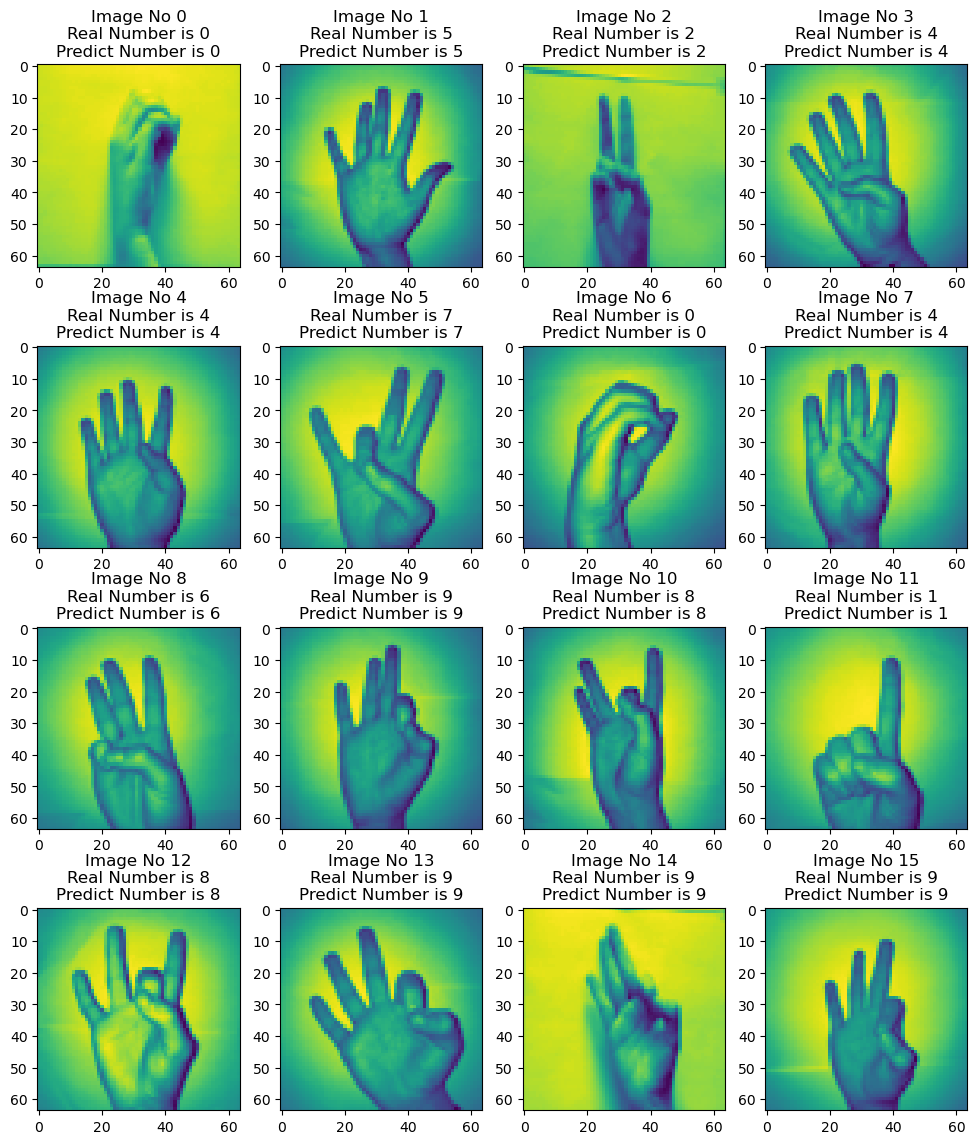

In [63]:
y_pred = model.predict(x_test)
fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate( axis.flat):
    ax.imshow(x_test[i])
    ax.set(title = f"Image No {i}\nReal Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");
  

13/13 [==============================] - 1s 35ms/step


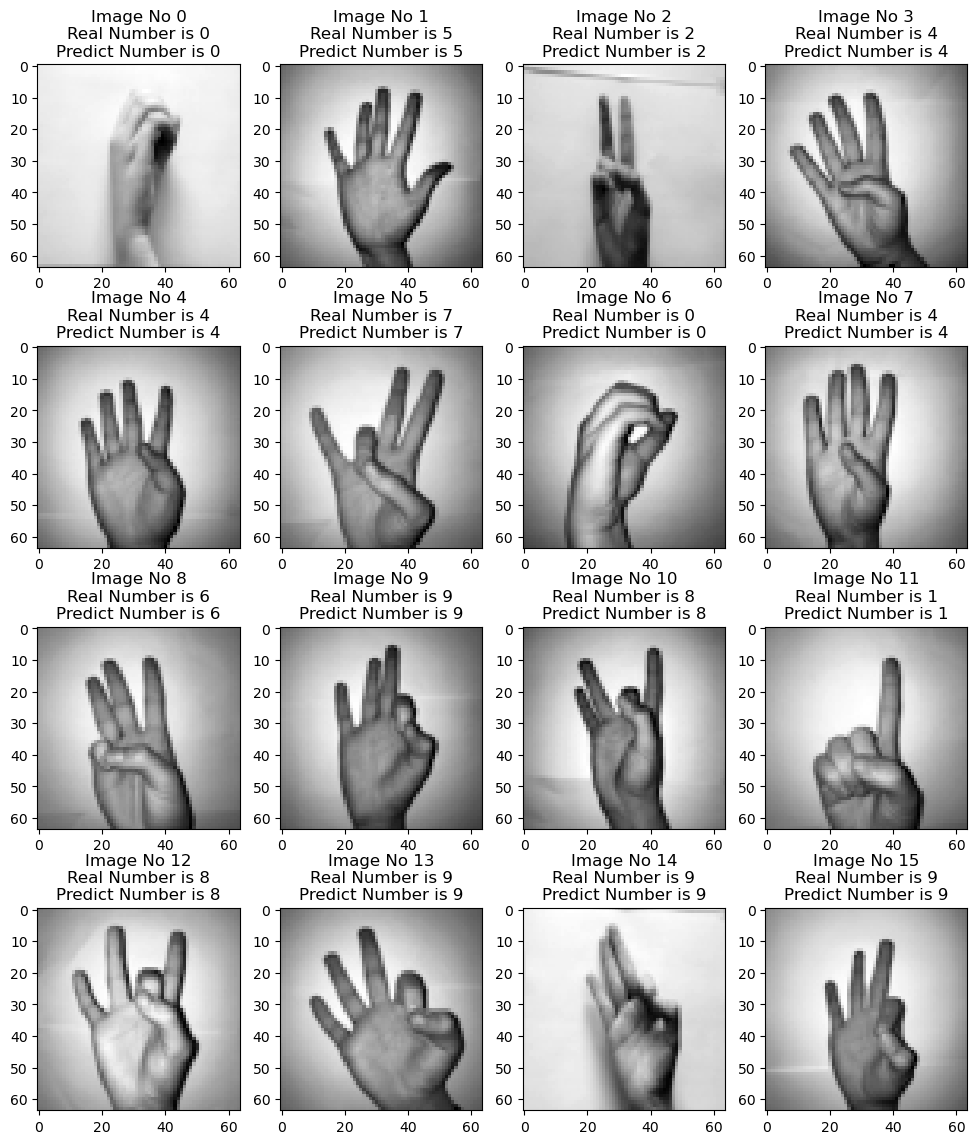

In [84]:
y_pred = model.predict(x_test)
fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate( axis.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set(title = f"Image No {i}\nReal Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");
  